In [1]:
#############################################################################
#          __________                                                       #
#   __  __/ ____/ __ \__ __   This file is part of MicroGP4 v1.0 "Kiwi"     #
#  / / / / / __/ /_/ / // /   (!) by Giovanni Squillero and Alberto Tonda   #
# / /_/ / /_/ / ____/ // /_   https://github.com/squillero/microgp4         #
# \__  /\____/_/   /__  __/                                                 #
#   /_/ --MicroGP4-- /_/      "You don't need a big goal, be μ-ambitious!!" #
#                                                                           #
#############################################################################

In [2]:
%matplotlib inline

import sys
sys.path += ['..']

import os
os.environ['PYTHONWARNINGS'] = 'default'

In [3]:
import microgp as ugp4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Paranoia checks are active; performances can be significantly impaired (consider using '-O')
  """Entry point for launching an IPython kernel.


In [12]:
import math, random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [169]:
def randint(a: int, b: int, loc=None, strength=None, raw=False) -> int:
    """Return a random integer N such that a <= N <= b. Do consider mean (loc) and strength."""
    #self._calls += 1
    assert isinstance(a, int) and isinstance(b, int), "Range must be int"
    assert loc is None or strength is not None, "Strength must be specified if loc is used"
    assert strength is None or loc is not None, "Loc must be specified if strength is used"
    assert strength is None or 0 <= strength <= 1, "Illegal strength"
    assert loc is None or a <= loc <= b, "Illegal loc"

    if strength is None or strength == 1:
        # pure random
        val = self._py_random.randint(a, b)
    elif strength == 0:
        # deterministic
        val = loc
    else:
        # "true" random
        scale = strength/(1-strength**3)
        scale *= b - a
        sa, sb = (a-.5-loc)/scale, (b+.5-loc)/scale

        # restore n' save numpy random state hoping for reproducibility
        #np_random.set_state(self._np_random)
        raw_val = truncnorm.rvs(a=sa, b=sb, loc=loc, scale=scale)
        #self._np_random = np_random.get_state()

        val = int(round(raw_val))
    assert a <= val <= b, f"Stochastic panic: val={val} not in [{a}, {b}]"
    return val

(array([0.000e+00, 0.000e+00, 1.941e+03, 1.840e+03, 1.786e+03, 1.793e+03,
        1.687e+03, 1.573e+03, 1.411e+03, 1.308e+03, 1.166e+03, 9.930e+02,
        9.090e+02, 7.550e+02, 6.100e+02, 5.050e+02, 4.000e+02, 3.170e+02,
        2.510e+02, 1.970e+02, 1.410e+02, 1.190e+02, 8.700e+01, 6.600e+01,
        5.100e+01, 2.400e+01, 2.200e+01, 2.100e+01, 7.000e+00, 1.000e+01,
        4.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

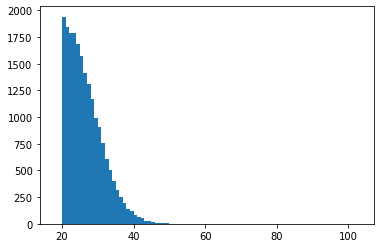

In [177]:
start, stop = 20, 100
x = [randint(start, stop, loc=20, strength=.1) for _ in range (20000)]
plt.hist(x, bins=list(range(start-2, stop+2+2)))

In [176]:
cnt = Counter(x)
{int(k): cnt[k] for k in sorted(cnt)}

{20: 386,
 21: 345,
 22: 364,
 23: 347,
 24: 359,
 25: 351,
 26: 343,
 27: 376,
 28: 344,
 29: 369,
 30: 382,
 31: 363,
 32: 348,
 33: 359,
 34: 359,
 35: 355,
 36: 348,
 37: 362,
 38: 304,
 39: 357,
 40: 338,
 41: 313,
 42: 341,
 43: 339,
 44: 304,
 45: 347,
 46: 321,
 47: 350,
 48: 335,
 49: 287,
 50: 289,
 51: 317,
 52: 300,
 53: 290,
 54: 289,
 55: 276,
 56: 288,
 57: 283,
 58: 249,
 59: 254,
 60: 254,
 61: 282,
 62: 267,
 63: 245,
 64: 245,
 65: 240,
 66: 212,
 67: 218,
 68: 204,
 69: 231,
 70: 216,
 71: 183,
 72: 210,
 73: 182,
 74: 205,
 75: 181,
 76: 163,
 77: 188,
 78: 174,
 79: 149,
 80: 166,
 81: 142,
 82: 160,
 83: 126,
 84: 131,
 85: 140,
 86: 136,
 87: 135,
 88: 122,
 89: 140,
 90: 109,
 91: 125,
 92: 130,
 93: 100,
 94: 108,
 95: 106,
 96: 92,
 97: 90,
 98: 92,
 99: 81,
 100: 89}

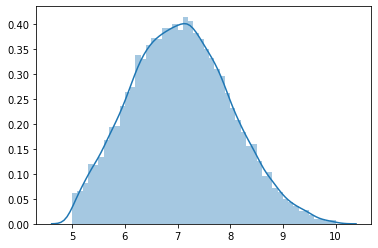

In [120]:
sns.distplot([randint(start, stop, loc=7, strength=.2, raw=True) for _ in range (20000)])

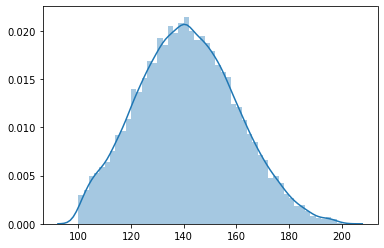

In [124]:
sns.distplot([randint(start*20, stop*20, loc=7*20, strength=.2, raw=True) for _ in range (20000)])

In [178]:
a = [1, 2, 3]
len(a)

3